In [1]:
import lalsimulation as lalsim
import lal
from lal import MSUN_SI, PC_SI, PI

In [20]:
mass1_in_SI_units = 20.*MSUN_SI
mass2_in_SI_units = 20.*MSUN_SI
spin1x = 0.
spin1y = 0.
spin1z = 0.
spin2x = 0.
spin2y = 0.
spin2z = 0.

distance = 400*1e6*PC_SI
delta_t = 1./8192
f_low = 15.
f_ref = 15.

param = lal.CreateDict()
approximant = lalsim.GetApproximantFromString('SEOBNRv4_opt') # Specify the waveform model to be SEOBNRv4


hplus, hcross = lalsim.SimInspiralTD(mass1_in_SI_units, mass2_in_SI_units, 
                                     spin1x, spin1y, spin1z, 
                                     spin2x, spin2y, spin2z, 
                                     distance, PI/3, 0.0, PI/2, 
                                     0.0, 0.0, delta_t, f_low, f_ref, 
                                     param, approximant)

In [3]:
approximant = lalsim.GetApproximantFromString('SEOBNRv4_opt')
print approximant

50


In [4]:
import numpy

time = numpy.arange(0, len(hplus.data.data)*delta_t, delta_t)
print len(time), hplus.data.length

52452 52452


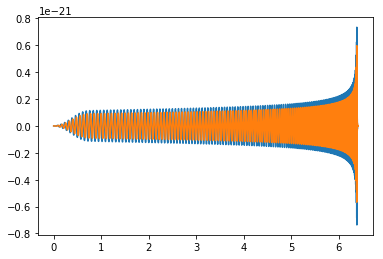

In [5]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(time, hplus.data.data)
plt.plot(time, hcross.data.data)

In [6]:
hplus.data.data

array([  0.00000000e+00,   2.36907314e-29,   9.35004814e-29, ...,
        -3.03869162e-28,  -1.31055129e-28,  -2.55792142e-29])

In [26]:
delta_f = 1./32
f_high = 2048.

approximant = lalsim.GetApproximantFromString('SEOBNRv3_ROM') # Different waveform model for frequency domain
hplus, hcross = lalsim.SimInspiralFD(mass1_in_SI_units, mass2_in_SI_units, 
                                     spin1x, spin1y, spin1z, 
                                     spin2x, spin2y, spin2z, 
                                     distance, PI/3, 0.0, PI/2, 0.0, 0.0, 
                                     delta_f, f_low, f_high, f_ref, 
                                     param, approximant)

In [27]:
freq = numpy.arange(0, delta_f*hplus.data.length, delta_f)
print len(freq), hplus.data.length

65537 65537


(0.03125, 4000.0)

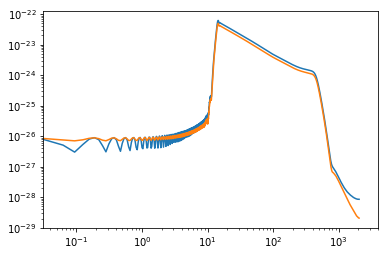

In [31]:
plt.loglog(freq, abs(hplus.data.data))
plt.loglog(freq, abs(hcross.data.data))
plt.xlim([0, 4000.])